In [1]:
import torch

In [9]:
input=torch.ones(1,2,5,5)
x=torch.nn.Conv2d(in_channels=2,out_channels=4,kernel_size=3)
out=x(input)

In [10]:
print(type(input))

<class 'torch.Tensor'>


In [11]:
print(out.shape)
print(out)

torch.Size([1, 4, 3, 3])
tensor([[[[-1.8916, -1.8916, -1.8916],
          [-1.8916, -1.8916, -1.8916],
          [-1.8916, -1.8916, -1.8916]],

         [[ 0.2364,  0.2364,  0.2364],
          [ 0.2364,  0.2364,  0.2364],
          [ 0.2364,  0.2364,  0.2364]],

         [[-0.0134, -0.0134, -0.0134],
          [-0.0134, -0.0134, -0.0134],
          [-0.0134, -0.0134, -0.0134]],

         [[-0.6133, -0.6133, -0.6133],
          [-0.6133, -0.6133, -0.6133],
          [-0.6133, -0.6133, -0.6133]]]], grad_fn=<MkldnnConvolutionBackward>)


In [12]:
print(list(x.parameters()))

[Parameter containing:
tensor([[[[-0.1216, -0.2251, -0.0614],
          [ 0.0317, -0.0024, -0.2247],
          [-0.2185, -0.0867,  0.0694]],

         [[-0.1549, -0.1175, -0.0160],
          [-0.2012, -0.1375,  0.1760],
          [-0.1693, -0.1963, -0.2048]]],


        [[[-0.1451, -0.1832, -0.1479],
          [-0.0012, -0.0996, -0.0865],
          [-0.1365, -0.1509,  0.1860]],

         [[ 0.1806,  0.2340, -0.2070],
          [ 0.1307,  0.2264, -0.0078],
          [ 0.0095,  0.1881,  0.0136]]],


        [[[ 0.2332, -0.0979, -0.0807],
          [-0.1030,  0.1762, -0.1286],
          [-0.0079,  0.2060, -0.1371]],

         [[ 0.0274,  0.0859,  0.0893],
          [-0.0270, -0.1765, -0.1284],
          [ 0.1545, -0.1832, -0.0405]]],


        [[[-0.1089, -0.1627, -0.2259],
          [-0.0816,  0.1480, -0.0744],
          [ 0.1314,  0.2087,  0.1388]],

         [[-0.1121, -0.1467, -0.0772],
          [-0.0209,  0.0875, -0.2026],
          [ 0.0287,  0.1005, -0.0590]]]], requires_grad=True

In [14]:
list(x.parameters())[0].shape

torch.Size([4, 2, 3, 3])

In [21]:
f_p=list(x.parameters())[0]
print("the result of first channel in image:", f_p[0].sum()+(-0.0310))

the result of first channel in image: tensor(0.2365, grad_fn=<AddBackward0>)


In [22]:
f_p=list(x.parameters())[0]
print("the result of first channel in image:", f_p[1].sum()+(0.2334))

the result of first channel in image: tensor(0.2365, grad_fn=<AddBackward0>)


In [2]:
x=torch.nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3)

In [7]:
list(x.parameters())[0].shape, list(x.parameters())[1].shape

(torch.Size([64, 64, 3, 3]), torch.Size([64]))

In [1]:
from fastai.vision import *
import torchsummary

In [2]:
path = Path('../../data/mnist')

In [3]:
tfms = get_transforms(do_flip=False)

In [4]:
data = (ImageList.from_folder(path)
       .split_by_folder(train='train', valid='valid')
       .label_from_folder()
       .transform(tfms, size=(224, 224))
       .databunch(bs=16, num_workers=0))

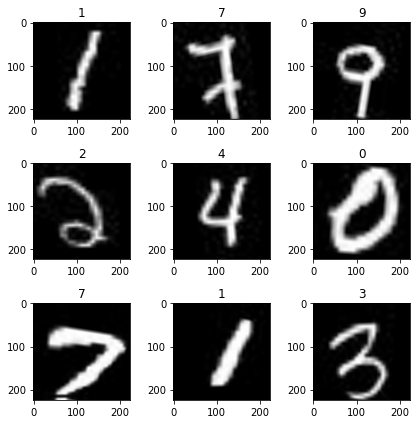

In [5]:
data.show_batch(3, figsize=(6,6), hide_axis=False)

In [6]:
learner = cnn_learner(data, models.vgg16_bn, metrics=error_rate)

In [7]:
model = learner.model

In [8]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print('parameters_count:',count_parameters(model))

parameters_count: 541450


In [9]:
torchsummary.summary(model, (3, 28, 28))

RuntimeError: Given input size: (512x1x1). Calculated output size: (512x0x0). Output size is too small